In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2



In [14]:
# Load the data from spam.csv

dataset = pd.read_csv('spam.csv' , usecols=[0,1], encoding ='ISO-8859-1')
dataset.head()
len(dataset)

5572

In [15]:
# Removes the extra whitespace
dataset['labels'] = dataset['labels'].str.strip()

# Map the labels to binary values
dataset['labels'] = dataset['labels'].map({'not spam': 0, 'spam': 1})

# Convert to NumPy arrays
sentences = dataset['data'].values
labels = dataset['labels'].values

print(sentences[:10])
print(labels[:10])

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
 'Even my brother is not like to speak with me. They treat me like aids patent.'
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'
 'Had your mobil

In [16]:
# Split the data into training and testing sets

training_size = int(0.7*len(sentences))

training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

print("Training Sentences:" , training_sentences[:5])
print("Training Labels:", training_labels[:5])
print("Testing Sentences:" , testing_sentences[:5])
print("Testing Labels:" ,  testing_labels[:5])

Training Sentences: ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"]
Training Labels: [0 0 1 0 0]
Testing Sentences: ['That depends. How would you like to be treated? :)'
 'Right on brah, see you later'
 'Waiting in e car 4 my mum lor. U leh? Reach home already?'
 'Your 2004 account for 07XXXXXXXXX shows 786 unredeemed points. To claim call 08719181259 Identifier code: XXXXX Expires 26.03.05'
 'Do you want a new video handset? 750 anytime any network mins? Half Price Line Rental? Camcorder? Reply or call 08000930705 for delivery tomorrow']
Testing Labels: [0 0 0 1 1]


In [17]:
# Tokenized the training

tokenizer = Tokenizer(num_words = 10000)

# Build the vocabulary 
tokenizer.fit_on_texts(training_sentences)

vocabulary = len(tokenizer.word_index)

print("Number of unique words:", vocabulary)


Number of unique words: 7439


In [18]:
# Create sequences of tokens which represents each sentence

train_sequences = tokenizer.texts_to_sequences(training_sentences)
test_sequences = tokenizer.texts_to_sequences(testing_sentences)

print("Training Sequences:" , train_sequences[:5])
print("Testing Sequences:" , test_sequences[:5])



Training Sequences: [[54, 426, 3510, 711, 786, 640, 65, 8, 1138, 85, 121, 309, 1297, 131, 2360, 1024, 66, 59, 3511, 136], [46, 331, 2361, 562, 6, 1817], [50, 427, 8, 22, 4, 859, 934, 2, 170, 1513, 1025, 534, 1514, 1818, 253, 1819, 71, 1513, 2, 1820, 2, 347, 427, 490, 935, 72, 443, 185, 602, 388, 2362], [6, 254, 152, 25, 320, 3512, 6, 142, 148, 55, 152], [860, 1, 92, 99, 69, 428, 2, 1139, 69, 1821, 203, 102, 491]]
Testing Sequences: [[19, 1225, 52, 172, 3, 58, 2, 29, 6154], [145, 18, 7353, 96, 3, 120], [244, 8, 131, 300, 44, 11, 775, 86, 6, 528, 371, 83, 148], [13, 1546, 356, 12, 3061, 383, 2420, 2421, 809, 2, 123, 17, 1046, 492, 6671, 1047, 732, 3145], [30, 3, 73, 4, 100, 440, 2492, 825, 826, 101, 444, 373, 350, 573, 305, 1213, 942, 88, 27, 17, 943, 12, 567, 150]]


In [19]:
# Pad the sequences to have the same length to be passed into the RNN model

padded_train = pad_sequences(train_sequences)

no_of_sequences = padded_train.shape[0]
length_of_sequence = padded_train.shape[1]

padded_test = pad_sequences(test_sequences, maxlen = length_of_sequence)

print("No. of training sequences:", no_of_sequences)
print("Length of training sequence:", length_of_sequence)
print("Shape of padded test sequences:",  padded_test.shape)
print(padded_train[0])



No. of training sequences: 3900
Length of training sequence: 189
Shape of padded test sequences: (1672, 189)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   54  426 3510  711  786  640   6

In [20]:
# Defining the RNN model

model = Sequential()

# Input layer 
model.add(Input(shape=(length_of_sequence,)))

# Defining embedding layer's output space dimension 
output_embed_dimension = 20

# Embedding layer
model.add(Embedding(vocabulary + 1, output_embed_dimension)) 

# Defining LSTM layer's output space dimension (Also the number of neurons in the LSTM layer)
LSTM_units = 15

# LSTM layer
model.add(LSTM(LSTM_units, return_sequences=True))

# Dropout layer to prevent overfitting by randomly setting input units to 0 at random during training time
model.add(Dropout((0.5)))

# Pooling layer to reduce the dimensionality of the output to pass into the Sigmoid layer
model.add(GlobalMaxPooling1D())

# Dense layer with sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 189, 20)        │       148,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 189, 15)        │         2,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 189, 15)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 15)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,976 (589.75 KB)

 Trainable params: 150,976 (589.75 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
EPOCHS = 10

# Training the model 

history = model.fit(padded_train, 
                    training_labels, 
                    epochs= EPOCHS, 
                    validation_data=(padded_test, testing_labels),
                    # automatically stop training when the validation loss stops decreasing to prevent overfitting
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.7628 - loss: 0.5518 - val_accuracy: 0.8636 - val_loss: 0.3647
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.8937 - loss: 0.2811 - val_accuracy: 0.9653 - val_loss: 0.2435
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9824 - loss: 0.1453 - val_accuracy: 0.9767 - val_loss: 0.1866
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9863 - loss: 0.0974 - val_accuracy: 0.9809 - val_loss: 0.1456
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9928 - loss: 0.0611 - val_accuracy: 0.9821 - val_loss: 0.1228
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9944 - loss: 0.0459 - val_accuracy: 0.9839 - val_loss: 0.1077
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.9942 - loss: 0.0388 - val_accuracy: 0.9856 - val_loss: 0.0966
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.9961 - loss: 0.0290 - val_acc

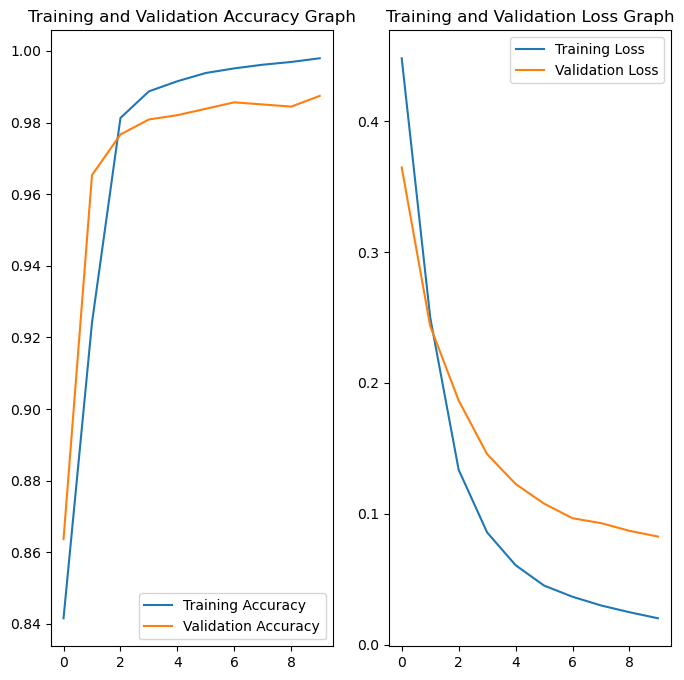

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy Graph')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss Graph')
plt.show()

In [23]:
# Evaluate the model

scores = model.evaluate(padded_test , testing_labels)

print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])



53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9862 - loss: 0.0858
Test Loss: 0.08256864547729492
Test Accuracy: 0.9874401688575745


In [24]:
# Function to preprocess and predict the test data
def predict_spam(input_line, tokenizer, model, maxlen):

    # Tokenize the input line
    sequence = tokenizer.texts_to_sequences([input_line])  

    # Pad the sequence to have the same length
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)  
    
    # Make prediction and get the probability
    prediction = model.predict(padded_sequence)[0][0]  
   
    if prediction > 0.5:
        return "Spam"
    else:
        return "Not Spam"


for idx, input_line in enumerate(testing_sentences[:15], start=1):
    final_answer = predict_spam(input_line, tokenizer, model, maxlen=length_of_sequence)
    print(f"Input {idx}: {input_line}")
    print(f"Prediction: {final_answer}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Input 1: That depends. How would you like to be treated? :)
Prediction: Not Spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Input 2: Right on brah, see you later
Prediction: Not Spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Input 3: Waiting in e car 4 my mum lor. U leh? Reach home already?
Prediction: Not Spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Input 4: Your 2004 account for 07XXXXXXXXX shows 786 unredeemed points. To claim call 08719181259 Identifier code: XXXXX Expires 26.03.05
Prediction: Spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Input 5: Do you want a new video handset? 750 anytime any network mins? Half Price Line Rental? Camcorder? Reply or call 08000930705 for delivery tomorrow
Prediction: Spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Input 6: Went fast asleep dear.take care.
Prediction: Not Spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Input 7: No that just means you have a fat head
Prediction: Not Spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
I